In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Custom imports
from BalanceDataset import *
from MachineLearningModels import model_performance, display_all_confusion_matrices, all_performances

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4]:
df = pd.read_csv("creditcard.csv")

if 'Time' in df.columns:
    df.drop('Time', axis=1, inplace=True)


In [5]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.01, random_state=42)
outlier_mask = clf.fit_predict(df.drop("Class", axis=1)) != -1
df_cleaned = df[outlier_mask]

In [6]:
corr_matrix = df_cleaned.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col].abs() > 0.95)]
df_selected = df_cleaned.drop(to_drop, axis=1)

In [7]:
X = df_selected.drop("Class", axis=1)
y = df_selected["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_bal, y_train_bal = balancedWithRandomOverSampler(X_train_scaled, y_train)


Non-Frauds: 225405 / 50.0 % of the dataset
Frauds: 225405 / 50.0 % of the dataset


In [14]:
# Assuming these imports are already present in your MachineLearningModels.py
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize an empty list to store model information (if not already initialized)
model_list = []
# Initialize an empty DataFrame to store performance metrics (if not already initialized)
all_performances = pd.DataFrame(columns=["model_name","precision", "recall", "f1_score", "AUC"])


def add_list(name, model, y_pred):
    """
    Adds model information to a global list.
    """
    model_list.append((name, model, y_pred))


def add_all_performances(name, precision, recall, f1_score, AUC):
    """
    Adds performance metrics for a model to the global all_performances DataFrame.
    """
    global all_performances  # Declare all_performances as global to modify it
    models = pd.DataFrame([[name, precision, recall, f1_score, AUC]],
                         columns=["model_name","precision", "recall", "f1_score", "AUC"])
    # Replace .append() with pd.concat()
    all_performances = pd.concat([all_performances, models], ignore_index=True)
    all_performances = all_performances.drop_duplicates()
    #print(all_performances.sort_values(by=['f1_score'], ascending=False))


def calculate_scores(X_train, X_test, y_train, y_test, y_pred, name, model):
    """
    Calculates various performance scores for a model.
    """
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    # cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

    # print(f'Precision: {precision:.2f}')
    # print(f'Recall: {recall:.2f}')
    # print(f'F1 Score: {f1_score:.2f}')
    # print(f'AUC: {AUC:.2f}')
    # print(f'Cross Validation AUC: {cross_val:.2f}')

    add_list(name, model, y_pred)
    add_all_performances(name, precision, recall, f1_score, AUC)
    #print(all_performances.sort_values(by=['f1_score'], ascending=False))


def model_performance(model, X_train, X_test, y_train, y_test, technique_name):
    """
    Trains a model, makes predictions, and calculates performance scores.
    """
    name = model.__class__.__name__ + "_" + technique_name
    print("***** "+ name +" STARTING *****")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("***** "+ name +" DONE *****")

    calculate_scores(X_train, X_test, y_train, y_test, y_pred, name, model)


def display_all_confusion_matrices(X_test, y_test):
    """
    Displays confusion matrices for all models in the model_list.
    """
    for name, model, y_pred in model_list:
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [15]:
# Assuming these imports are already present in your MachineLearningModels.py
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize an empty list to store model information (if not already initialized)
model_list = []
# Initialize an empty DataFrame to store performance metrics (if not already initialized)
all_performances = pd.DataFrame(columns=["model_name","precision", "recall", "f1_score", "AUC"])


def add_list(name, model, y_pred):
    """
    Adds model information to a global list.
    """
    model_list.append((name, model, y_pred))


# Renamed the parameter from f1_score to f1 to avoid conflict
def add_all_performances(name, precision, recall, f1, AUC):
    """
    Adds performance metrics for a model to the global all_performances DataFrame.
    """
    global all_performances  # Declare all_performances as global to modify it
    # Use the renamed parameter f1 here
    models = pd.DataFrame([[name, precision, recall, f1, AUC]],
                         columns=["model_name","precision", "recall", "f1_score", "AUC"])
    # Replace .append() with pd.concat()
    all_performances = pd.concat([all_performances, models], ignore_index=True)
    all_performances = all_performances.drop_duplicates()
    #print(all_performances.sort_values(by=['f1_score'], ascending=False))


# Renamed the parameter from f1_score to f1 to avoid conflict
def calculate_scores(X_train, X_test, y_train, y_test, y_pred, name, model):
    """
    Calculates various performance scores for a model.
    """
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    # Call the imported f1_score function and assign to a local variable
    f1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    # cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

    # print(f'Precision: {precision:.2f}')
    # print(f'Recall: {recall:.2f}')
    # print(f'F1 Score: {f1:.2f}')
    # print(f'AUC: {AUC:.2f}')
    # print(f'Cross Validation AUC: {cross_val:.2f}')

    add_list(name, model, y_pred)
    # Pass the calculated f1 score (local variable) to add_all_performances
    add_all_performances(name, precision, recall, f1, AUC)
    #print(all_performances.sort_values(by=['f1_score'], ascending=False))


def model_performance(model, X_train, X_test, y_train, y_test, technique_name):
    """
    Trains a model, makes predictions, and calculates performance scores.
    """
    name = model.__class__.__name__ + "_" + technique_name
    print("***** "+ name +" STARTING *****")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("***** "+ name +" DONE *****")

    calculate_scores(X_train, X_test, y_train, y_test, y_pred, name, model)


def display_all_confusion_matrices(X_test, y_test):
    """
    Displays confusion matrices for all models in the model_list.
    """
    for name, model, y_pred in model_list:
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

In [16]:
model_performance(LogisticRegression(), X_train_bal, X_test_scaled, y_train_bal, y_test, "LogReg")
model_performance(DecisionTreeClassifier(), X_train_bal, X_test_scaled, y_train_bal, y_test, "DecisionTree")
model_performance(RandomForestClassifier(), X_train_bal, X_test_scaled, y_train_bal, y_test, "RandomForest")
model_performance(KNeighborsClassifier(), X_train_bal, X_test_scaled, y_train_bal, y_test, "KNN")


***** LogisticRegression_LogReg STARTING *****
***** LogisticRegression_LogReg DONE *****
***** DecisionTreeClassifier_DecisionTree STARTING *****
***** DecisionTreeClassifier_DecisionTree DONE *****
***** RandomForestClassifier_RandomForest STARTING *****
***** RandomForestClassifier_RandomForest DONE *****
***** KNeighborsClassifier_KNN STARTING *****
***** KNeighborsClassifier_KNN DONE *****


In [17]:
all_performances.sort_values(by="f1_score", ascending=False).reset_index(drop=True)


,model_name,precision,recall,f1_score,AUC
0,RandomForestClassifier_RandomForest,0.888889,0.400,0.551724,0.699982
1,DecisionTreeClassifier_DecisionTree,0.558824,0.475,0.513514,0.737367
2,KNeighborsClassifier_KNN,0.440000,0.550,0.488889,0.774752
3,LogisticRegression_LogReg,0.009406,0.800,0.018594,0.870099


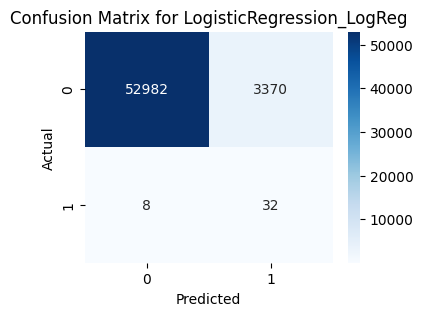

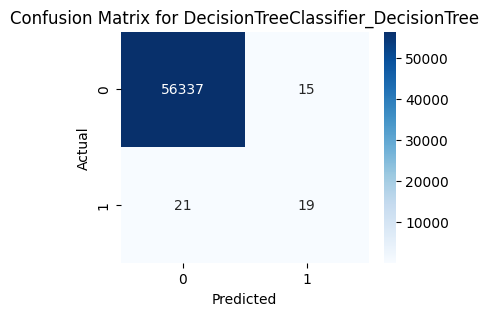

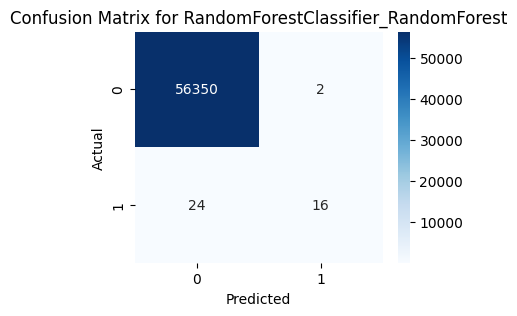

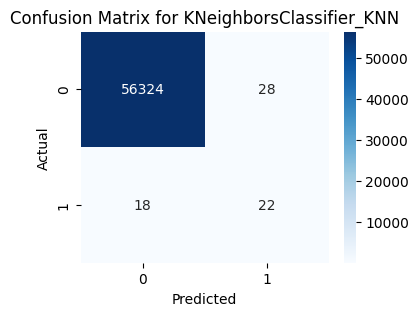

In [19]:
display_all_confusion_matrices(X_test_scaled, y_test)

In [21]:
# Save cleaned dataset and scaler for ML
df_selected.to_csv("cleaned_dataset_ml.csv", index=False)
joblib.dump(scaler, "scaler_ml.pkl")


['scaler_ml.pkl']